In [1]:
! pip install requests

In [1]:
# import all necessary libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# frankfurter api call
base_url = 'https://api.frankfurter.app/2013-01-01..2023-12-31'
response = requests.get(base_url)
json_response = response.json()
df = pd.DataFrame(json_response)
df.head()

,amount,base,start_date,end_date,rates
2012-12-31,1.0,EUR,2012-12-31,2023-12-25,"{'AUD': 1.2534, 'BGN': 1.9558, 'BRL': 2.6831, ..."
2013-01-07,1.0,EUR,2012-12-31,2023-12-25,"{'AUD': 1.2454, 'BGN': 1.9558, 'BRL': 2.6658, ..."
2013-01-14,1.0,EUR,2012-12-31,2023-12-25,"{'AUD': 1.2649, 'BGN': 1.9558, 'BRL': 2.7182, ..."
2013-01-21,1.0,EUR,2012-12-31,2023-12-25,"{'AUD': 1.2713, 'BGN': 1.9558, 'BRL': 2.7238, ..."
2013-01-28,1.0,EUR,2012-12-31,2023-12-25,"{'AUD': 1.2985, 'BGN': 1.9558, 'BRL': 2.7009, ..."


In [3]:
# normalize the rates column
df_rates = pd.json_normalize(df['rates'])
df_rates.head()


,AUD,BGN,BRL,CAD,CHF,CNY,CZK,DKK,GBP,HKD,...,PLN,RON,RUB,SEK,SGD,THB,TRY,USD,ZAR,ISK
0,1.2534,1.9558,2.6831,1.2960,1.2091,8.1813,25.278,7.4597,0.81235,10.1738,...,4.0925,4.4281,39.796,8.5471,1.6072,39.909,2.3412,1.3125,11.2497,NaN
1,1.2454,1.9558,2.6658,1.2930,1.2106,8.1627,25.579,7.4605,0.81633,10.1650,...,4.1083,4.3994,39.793,8.5756,1.6094,39.818,2.3299,1.3114,11.3051,NaN
2,1.2649,1.9558,2.7182,1.3157,1.2372,8.2884,25.597,7.4626,0.83257,10.3323,...,4.1274,4.3564,40.374,8.6386,1.6330,39.884,2.3541,1.3327,11.7232,NaN
3,1.2713,1.9558,2.7238,1.3324,1.2410,8.3096,25.608,7.4629,0.84293,10.3566,...,4.1750,4.3650,40.287,8.6904,1.6409,39.804,2.3626,1.3358,11.9565,NaN
4,1.2985,1.9558,2.7009,1.3572,1.2395,8.4169,25.652,7.4605,0.85702,10.4907,...,4.1961,4.3848,40.662,8.6231,1.6743,40.348,2.3862,1.3522,12.1687,NaN


In [4]:
# reset index the index
df=df.reset_index()
df

,index,amount,base,start_date,end_date,rates
0,2012-12-31,1.0,EUR,2012-12-31,2023-12-25,"{'AUD': 1.2534, 'BGN': 1.9558, 'BRL': 2.6831, ..."
1,2013-01-07,1.0,EUR,2012-12-31,2023-12-25,"{'AUD': 1.2454, 'BGN': 1.9558, 'BRL': 2.6658, ..."
2,2013-01-14,1.0,EUR,2012-12-31,2023-12-25,"{'AUD': 1.2649, 'BGN': 1.9558, 'BRL': 2.7182, ..."
3,2013-01-21,1.0,EUR,2012-12-31,2023-12-25,"{'AUD': 1.2713, 'BGN': 1.9558, 'BRL': 2.7238, ..."
4,2013-01-28,1.0,EUR,2012-12-31,2023-12-25,"{'AUD': 1.2985, 'BGN': 1.9558, 'BRL': 2.7009, ..."
...,...,...,...,...,...,...
569,2023-11-27,1.0,EUR,2012-12-31,2023-12-25,"{'AUD': 1.6544, 'BGN': 1.9558, 'BRL': 5.3684, ..."
570,2023-12-04,1.0,EUR,2012-12-31,2023-12-25,"{'AUD': 1.6394, 'BGN': 1.9558, 'BRL': 5.307, '..."
571,2023-12-11,1.0,EUR,2012-12-31,2023-12-25,"{'AUD': 1.6376, 'BGN': 1.9558, 'BRL': 5.3508, ..."
572,2023-12-18,1.0,EUR,2012-12-31,2023-12-25,"{'AUD': 1.6225, 'BGN': 1.9558, 'BRL': 5.3582, ..."


In [5]:
# drop the rates column
df = df.drop('rates',axis=1)
df.head()

,index,amount,base,start_date,end_date
0,2012-12-31,1.0,EUR,2012-12-31,2023-12-25
1,2013-01-07,1.0,EUR,2012-12-31,2023-12-25
2,2013-01-14,1.0,EUR,2012-12-31,2023-12-25
3,2013-01-21,1.0,EUR,2012-12-31,2023-12-25
4,2013-01-28,1.0,EUR,2012-12-31,2023-12-25


In [6]:
# concatenate the df and df_rates
df = pd.concat([df,df_rates],axis=1)
df.head()

,index,amount,base,start_date,end_date,AUD,BGN,BRL,CAD,CHF,...,PLN,RON,RUB,SEK,SGD,THB,TRY,USD,ZAR,ISK
0,2012-12-31,1.0,EUR,2012-12-31,2023-12-25,1.2534,1.9558,2.6831,1.2960,1.2091,...,4.0925,4.4281,39.796,8.5471,1.6072,39.909,2.3412,1.3125,11.2497,NaN
1,2013-01-07,1.0,EUR,2012-12-31,2023-12-25,1.2454,1.9558,2.6658,1.2930,1.2106,...,4.1083,4.3994,39.793,8.5756,1.6094,39.818,2.3299,1.3114,11.3051,NaN
2,2013-01-14,1.0,EUR,2012-12-31,2023-12-25,1.2649,1.9558,2.7182,1.3157,1.2372,...,4.1274,4.3564,40.374,8.6386,1.6330,39.884,2.3541,1.3327,11.7232,NaN
3,2013-01-21,1.0,EUR,2012-12-31,2023-12-25,1.2713,1.9558,2.7238,1.3324,1.2410,...,4.1750,4.3650,40.287,8.6904,1.6409,39.804,2.3626,1.3358,11.9565,NaN
4,2013-01-28,1.0,EUR,2012-12-31,2023-12-25,1.2985,1.9558,2.7009,1.3572,1.2395,...,4.1961,4.3848,40.662,8.6231,1.6743,40.348,2.3862,1.3522,12.1687,NaN


In [7]:
# descriptive statistics
df.describe()

,amount,AUD,BGN,BRL,CAD,CHF,CNY,CZK,DKK,GBP,...,PLN,RON,RUB,SEK,SGD,THB,TRY,USD,ZAR,ISK
count,574.0,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,...,574.000000,574.000000,479.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,309.000000
mean,1.0,1.532103,1.955118,4.452196,1.458304,1.101135,7.644716,26.014655,7.450612,0.846424,...,4.361363,4.673043,69.044762,9.979954,1.558466,38.205521,8.144717,1.160372,16.170228,143.741489
std,0.0,0.094395,0.016328,1.156414,0.064165,0.077833,0.418751,1.105995,0.011135,0.049994,...,0.180549,0.204504,14.580990,0.802502,0.078174,2.479806,7.152838,0.094420,2.165724,10.226118
min,1.0,1.229000,1.564600,2.549700,1.293000,0.933330,6.604400,23.376000,7.433400,0.701060,...,3.998200,4.318400,39.725000,8.330500,1.388800,33.264000,2.321100,0.966180,11.249700,121.450000
25%,1.0,1.468400,1.955800,3.459000,1.421950,1.058800,7.348950,25.448000,7.439900,0.835135,...,4.220400,4.469825,61.878500,9.330125,1.508125,36.736750,3.186275,1.094200,14.567450,137.460000
50%,1.0,1.546400,1.955800,4.326000,1.463900,1.089400,7.712500,25.856000,7.450150,0.858055,...,4.303200,4.657000,71.041000,10.110550,1.552600,37.978000,5.508900,1.131700,16.117500,144.580000
75%,1.0,1.601250,1.955800,5.375150,1.504325,1.153900,7.884475,27.029000,7.460500,0.879935,...,4.496850,4.881625,78.068500,10.526225,1.607275,39.117250,9.684925,1.201800,17.460825,150.660000
max,1.0,1.838300,1.955800,6.801000,1.597100,1.249700,8.667400,28.111000,7.473100,0.923170,...,4.857700,4.974600,116.340000,11.911400,1.758800,45.112000,32.646000,1.389600,21.085000,164.960000


## Insights About Data
- The mean and the median are almost the same, the distribution is assumed to be normal distribution
- 



In [8]:
# view all columns in the DataFrame
df.columns

Index(['index', 'amount', 'base', 'start_date', 'end_date', 'AUD', 'BGN',
       'BRL', 'CAD', 'CHF', 'CNY', 'CZK', 'DKK', 'GBP', 'HKD', 'HRK', 'HUF',
       'IDR', 'ILS', 'INR', 'JPY', 'KRW', 'LTL', 'LVL', 'MXN', 'MYR', 'NOK',
       'NZD', 'PHP', 'PLN', 'RON', 'RUB', 'SEK', 'SGD', 'THB', 'TRY', 'USD',
       'ZAR', 'ISK'],
      dtype='object')

In [9]:
# display information about the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       574 non-null    object 
 1   amount      574 non-null    float64
 2   base        574 non-null    object 
 3   start_date  574 non-null    object 
 4   end_date    574 non-null    object 
 5   AUD         574 non-null    float64
 6   BGN         574 non-null    float64
 7   BRL         574 non-null    float64
 8   CAD         574 non-null    float64
 9   CHF         574 non-null    float64
 10  CNY         574 non-null    float64
 11  CZK         574 non-null    float64
 12  DKK         574 non-null    float64
 13  GBP         574 non-null    float64
 14  HKD         574 non-null    float64
 15  HRK         522 non-null    float64
 16  HUF         574 non-null    float64
 17  IDR         574 non-null    int64  
 18  ILS         574 non-null    float64
 19  INR         574 non-null    f

- The information suggests the presence of missing values 

In [10]:
# check for null values
df.isna().sum()

index           0
amount          0
base            0
start_date      0
end_date        0
AUD             0
BGN             0
BRL             0
CAD             0
CHF             0
CNY             0
CZK             0
DKK             0
GBP             0
HKD             0
HRK            52
HUF             0
IDR             0
ILS             0
INR             0
JPY             0
KRW             0
LTL           469
LVL           521
MXN             0
MYR             0
NOK             0
NZD             0
PHP             0
PLN             0
RON             0
RUB            95
SEK             0
SGD             0
THB             0
TRY             0
USD             0
ZAR             0
ISK           265
dtype: int64

- Our Analysis won't based on the columns with the null values, it is advisable then to ignore these values

## Question 1 
## Trend of Exchange Rate of EUR to USD

<Axes: title={'center': 'Exchange Rates of EUR Against USD Over Time'}>

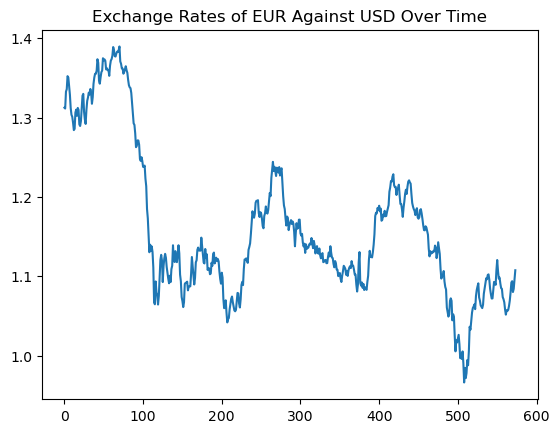

In [11]:
# line plot to show exchange rate of EUR Against USD
plt.title("Exchange Rates of EUR Against USD Over Time")
eur_usd_rate = df['USD'].plot(kind='line')
eur_usd_rate

- From the trendline, it shows the EUR is becoming weaker as compared to the USD for the past 10 years
- It is showing a potential of rising again from the ending of 2023

## Question 2
## Distribution of Exchange Rate For CNY Against Euros

(array([ 12.,  42.,  49.,  76.,  69., 148.,  94.,  41.,  28.,  15.]),
 array([6.6044, 6.8107, 7.017 , 7.2233, 7.4296, 7.6359, 7.8422, 8.0485,
        8.2548, 8.4611, 8.6674]),
 <BarContainer object of 10 artists>)

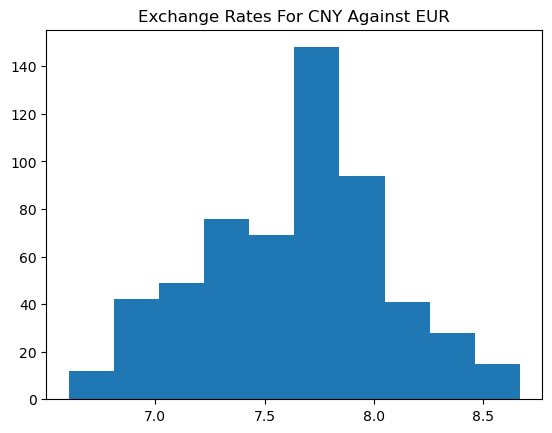

In [12]:
# histogram plot to show the distribution of CNY Against EUR
cyn_eur = plt.hist(df['CNY'])
plt.title("Exchange Rates For CNY Against EUR")
cyn_eur

- The figure above shows a normal distribution of the Chinese CNY against the EUR 

## Question 3
## Volatility of Currency

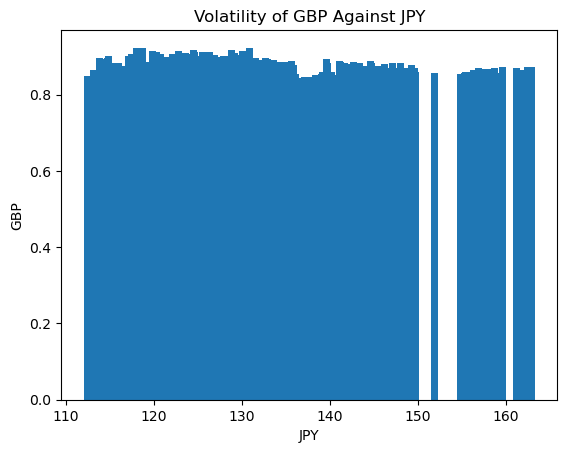

In [13]:
# bar chart showing the volatility of GBP Against JPY
pound = df['GBP']
yen = df['JPY']
# df.plot(kind='bar',x=pound,y=yen)

plt.bar(yen,pound)
plt.xlabel('JPY')
plt.ylabel('GBP')
plt.title('Volatility of GBP Against JPY')
plt.show()

- can be seen from the graph above that the GBP and JPY currencies are less volatile

## scatter

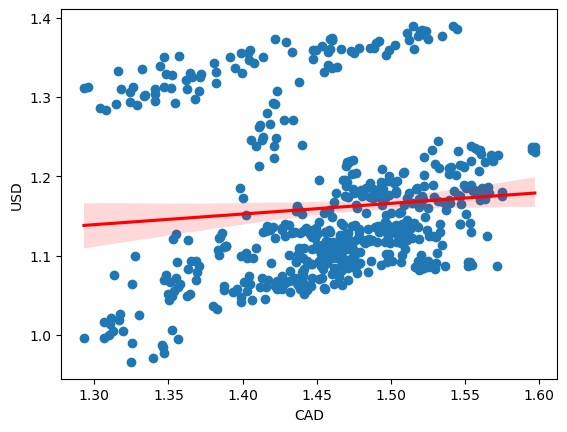

In [18]:
# relationship
plt.scatter(x=df['CAD'],y=df['USD'])
sns.regplot(x=df['CAD'],y=df['USD'],scatter = False,color='red')
plt.show()

- There exists a positive correlation between the US Dollars(USD) and the Canadian Dollars(CAD) as shown in the graph above